# Plots for the paper

[Nathanaël Perraudin](http://perraudin.info), [Michaël Defferrard](http://deff.ch), Tomasz Kacprzak

In [1]:
# import matplotlib
# matplotlib.use('gtkagg')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import healpy as hp
from pygsp import filters
import os
from scnn import utils
import matplotlib


In [4]:
plt.rcParams['figure.figsize'] = (17, 5)  # (9, 4) for matplotlib notebook

In [5]:
pathfig = './figures/'
os.makedirs(pathfig, exist_ok=True)

## 1 Graph

Let us try to have a nice graph

### The full sphere

In [ ]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(111, projection='3d')
G = utils.healpix_graph(nside=8, nest=True)
G.plotting.update(vertex_size=10)
G.plot(ax=ax,edges=False)

# Get rid of the ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_title('Healpix sampling, Nside=8')
plt.gcf().savefig(pathfig+"healpix_sampling_8.pdf", bbox_inches='tight')


fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111, projection='3d')
G = utils.healpix_graph(nside=4, nest=True)
G.plotting.update(vertex_size=20)
G.plot(ax=ax)

# Get rid of the ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_title('Graph, full sphere, Nside=4')
plt.gcf().savefig(pathfig+"healpix_graph_4.pdf", bbox_inches='tight')


### Half the sphere

In [ ]:
nside = 4
npoints = hp.nside2npix(nside)
indexes = hp.reorder(np.array(list(range(npoints))),n2r=True)[:npoints//2]
G = utils.healpix_graph(nside=nside, nest=True, indexes=indexes)
G.plotting['elevation']=90
G.plotting['azimuth']=0
G.plotting.update(vertex_size=50)
G.plot(ax=ax,edges=False)



fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111, projection='3d')
# plt.cm.Blues_r

# Highlight the node with a degree of 7 on the full sphere
G2 = utils.healpix_graph(nside=nside, nest=True)
snode = np.arange(0,G2.N)[G2.d==7]
sindex = set(indexes)
snode2 = [el for el in snode if el in sindex]
hl_index = [np.argmin(np.abs(indexes-el)) for el in snode2]
sig = np.zeros([G.N])
sig[hl_index]=1

G.plot_signal(1-sig, ax=ax,colorbar=False)
# G.plot(ax=ax)
# Get rid of the ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Remove the title
# ax.set_title('Graph, half sphere, Nside=4')
ax.set_title('')

# Zoom in
c = 0.6
plt.axis([c*min(G.coords[:,0]), c*max(G.coords[:,0]), c*min(G.coords[:,1]), c*max(G.coords[:,1]) ])

plt.gcf().savefig(pathfig+"half_graph_4.pdf", bbox_inches='tight')

# 2 Pooling

In [ ]:
order = 4

index = np.arange(hp.nside2npix(order)) + 1
mask = np.zeros_like(index, dtype=np.bool)
mask[:order**2] = 1
index *= mask
index = index.astype(np.float)
index[index==0] = hp.UNSEEN
hp.mollview(index, title='', nest=True, cbar=False,cmap=None, xsize=1600)
plt.gcf().savefig(pathfig+"pooling-order4.pdf", bbox_inches='tight')

order = 2
index = np.arange(hp.nside2npix(order)) + 1
mask = np.zeros_like(index, dtype=np.bool)
mask[:order**2] = 1
index *= mask
index = index.astype(np.float)
index[index==0] = hp.UNSEEN
hp.mollview(index, title='', nest=True, cbar=False,cmap=None, xsize=1600)
plt.gcf().savefig(pathfig+"pooling-order2.pdf", bbox_inches='tight')


order = 1
index = np.arange(hp.nside2npix(order)) + 1
mask = np.zeros_like(index, dtype=np.bool)
mask[:order**2] = 1
index *= mask
index = index.astype(np.float)
index[index==0] = hp.UNSEEN
hp.mollview(index, title='', nest=True, cbar=False,cmap=None, xsize=1600)
plt.gcf().savefig(pathfig+"pooling-order1.pdf", bbox_inches='tight')


index = np.array(list(range(12)))
hp.mollview(index, title='', nest=True, cbar=False,cmap=None, xsize=1600)
plt.gcf().savefig(pathfig+"12parts.pdf", bbox_inches='tight')


# 3 Fourier basis



In [ ]:
G = utils.healpix_graph(nside=16, lap_type='normalized', nest=True, dtype=np.float64)

In [ ]:
# Compute all eigenvectors.
G.compute_fourier_basis()


Let us display a few Fourier modes on the healpix map.

In [ ]:
matplotlib.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(17, 10))
ne = 16
for ind in range(ne):
    hp.mollview(G.U[:, ind], 
                title='Eigenvector {}'.format(ind), 
                nest=True, 
                sub=(np.sqrt(ne), np.sqrt(ne), ind+1),
                max=np.max(np.abs(G.U[:, :ne])),
                min=-np.max(np.abs(G.U[:, :ne])),
                cbar=False)
plt.gcf().savefig(pathfig+"eigenvectors.pdf", bbox_inches='tight')


# 4 Convolution on graphs

In [ ]:

taus = [5, 10, 20, 50]
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1,len(taus), figsize=(17, 4))
for i,tau in enumerate(taus):
    hf = filters.Heat(G, tau=tau)
    hf.plot(eigenvalues=False, sum=False, ax=ax[i])
    ax[i].set_xlabel('Graph eigenvalues', fontsize=18)
    if i is not 0:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('Spectral response', fontsize=18)
    ax[i].set_title('$t={}$'.format(tau), fontsize=22)
fig.tight_layout(rect=[0, 0.05, 1, 0.92])

plt.suptitle('Filter response in the graph spectral domain', fontsize=27)
plt.gcf().savefig(pathfig+"gaussian_filters_spectral.pdf", bbox_inches='tight')


In [ ]:
hf = filters.Heat(G,tau=taus)

def arcmin2rad(x):
    return x / 60 / 360 * 2 * np.pi

def gaussian_smoothing(sig, sigma, nest=True):
    if nest:
        sig = hp.reorder(sig, n2r=True)
    smooth = hp.sphtfunc.smoothing(sig, sigma=arcmin2rad(sigma))
    if nest:
        smooth = hp.reorder(smooth, r2n=True)
    return smooth
_, center = utils.get_index_equator(hp.npix2nside(G.N), radius=20)
ind0 = center
sig = np.zeros(G.N)
sig[ind0] = 1
conv = hf.analyze(sig)

fig = plt.figure()
rel_diff = []
matplotlib.rcParams.update({'font.size': 22})
for i, (tau, sigma) in enumerate(zip(taus, [315, 465, 670, 1080])):
    smooth = gaussian_smoothing(sig, sigma, nest=True)
    m = max(smooth)
    hp.mollview(conv[:, i], 
                title='$t={}$'.format(tau), 
                nest=True, 
                min=0, max=m,
                cbar=False,
                rot=(180,0,180),
                sub=(2, len(taus), i+1))
    hp.mollview(smooth, 
                title='$\sigma={}$'.format(sigma), 
                nest=True, 
                min=0, max=m,
                cbar=False,
                rot=(180,0,180),
                sub=(2,len(taus),i+len(taus)+1))
    diff = (conv[:, i]-smooth)
    rel_diff.append(np.linalg.norm(diff)/np.linalg.norm(smooth))
#     hp.mollview(diff, 
#                 title='', 
#                 nest=True,
#                 cbar=False,
#                 sub=(3, len(taus), i+2*len(taus)+1))
print(rel_diff)

plt.gcf().savefig(pathfig+"gaussian_filters_sphere.pdf", bbox_inches='tight')

In [ ]:
hf = filters.Heat(G,tau=taus)
order = 20
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure( figsize=(17, 5.5))
utils.plot_filters_gnomonic(filters=hf,order=order, title='')
plt.suptitle('Gnomonic projection of a convoluted delta', fontsize=27)

plt.gcf().savefig(pathfig+"gaussian_filters_gnomonic.pdf", bbox_inches='tight')

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
utils.plot_filters_section(hf, order=order, xlabel='', ylabel='', title='')
plt.suptitle('Section of a convoluted delta', fontsize=22)
plt.gcf().savefig(pathfig+"gaussian_filters_section.pdf", bbox_inches='tight')

In [ ]:
utils.plot_index_filters_section(hf,order=order)
plt.gcf().savefig(pathfig+"index_plotting_order{}_nside16.pdf".format(order), bbox_inches='tight')

# 5 Experiment results

In [9]:
sigma = 3
scnn_result = np.squeeze(np.load('results/scnn/scnn_results_sigma{}.npz'.format(sigma))['arr_0'])
hist_result = np.squeeze(np.load('results/histogram/histogram_results_sigma{}.npz'.format(sigma))['arr_0'])
psd_result = np.squeeze(np.load('results/psd/psd_results_sigma{}.npz'.format(sigma))['arr_0'])
scnn_result.shape

(3, 5)

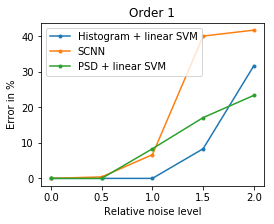

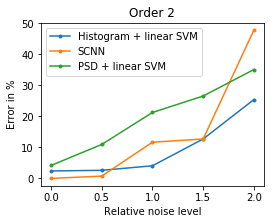

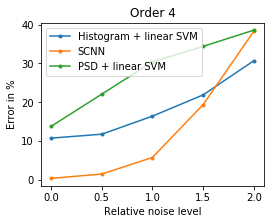

In [10]:
# To be updated
if sigma==3:
    sigma_noise = [0, 0.5, 1, 1.5, 2]
else:
    sigma_noise = [1, 2, 3, 4, 5]
for i, order in enumerate([1, 2, 4]):
    err_hist = hist_result[i]*100
    err_scnn = scnn_result[i]*100
    err_psd = psd_result[i]*100

    plt.figure(figsize=[4,3])
    plt.plot(sigma_noise, err_hist,'.-')
    plt.plot(sigma_noise, err_scnn,'.-')
    plt.plot(sigma_noise, err_psd,'.-')
    plt.legend(['Histogram + linear SVM', 'SCNN', 'PSD + linear SVM'])
#     plt.legend(['Histogram + linear SVM', 'SCNN'])
    plt.xlabel('Relative noise level')
    plt.ylabel('Error in %')
    plt.title('Order {}'.format(order))
    plt.gcf().savefig(pathfig+"result_order{}.pdf".format(order), bbox_inches='tight')

/home/nati/.virtualenvs/scnn-py3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


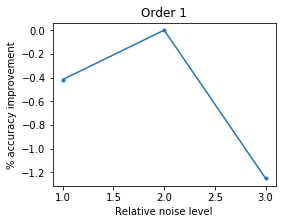

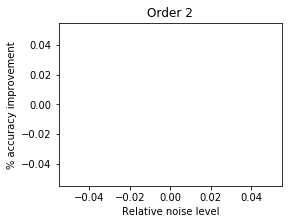

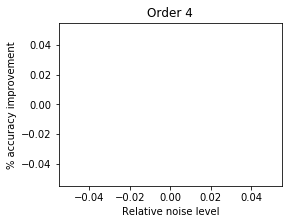

In [25]:
# To be updated
sigma_noise = [1, 2, 3, 4, 5]
for i, order in enumerate([1, 2, 4]):
    plt.figure(figsize=[4,3])
    improvement = (hist_result[i] - scnn_result[i])/scnn_result[i]
    improvement = (hist_result[i] - scnn_result[i])*100
    plt.plot(sigma_noise, improvement,'.-')
    plt.xlabel('Relative noise level')
#     plt.ylabel('Relative improvement')
    plt.ylabel('% accuracy improvement')
    plt.title('Order {}'.format(order))
#     plt.gcf().savefig(pathfig+"relative_result_order{}.pdf".format(order), bbox_inches='tight')

In [ ]:
scnn_result*100

In [ ]:
hist_result*100

# 6 Experiment data

In [ ]:
orders = [1,2,4]
order_max = max(orders)
npix = hp.nside2npix(order_max)
index = np.zeros([npix])
for order in orders:
    index[:order**2] = index[:order**2]+1
index.astype(np.float)
index[index==0] = hp.UNSEEN
hp.mollview(index, title='Restriction to a part of the sphere', nest=True, cbar=False,cmap=None, xsize=1600)
plt.gcf().savefig(pathfig+"part_sphere.pdf", bbox_inches='tight')

### Plotting some data

In [ ]:
img1 = hp.read_map('data/same_psd/kappa_omega_m_0p31_s_1.fits')
img2 = hp.read_map('data/same_psd/kappa_omega_m_0p26_s_1.fits')
img1 = hp.reorder(img1, r2n=True)
img2 = hp.reorder(img2, r2n=True)
Nside = 1024
img1 = hp.ud_grade(img1, nside_out=Nside, order_in='NESTED')
img2 = hp.ud_grade(img2, nside_out=Nside, order_in='NESTED')
cmin = min(np.min(img1), np.min(img2))
cmax = max(np.max(img1), np.max(img2))
cmax = -2*cmin

In [ ]:
# _ = plt.hist(img1,bins=100)

In [ ]:
# hp.mollview(img1, title='Map 1, omega_m=0.31, pk_norm=0.82, h=0.7', nest=True, min=cmin, max=cmax)
# hp.mollview(img2, title='Map 2, omega_m=0.26, sigma_8=0.91, h=0.7', nest=True, min=cmin, max=cmax)

In [ ]:
def zoom_mollview(sig, cmin=None, cmax=None, nest=True):
    from numpy.ma import masked_array
    from matplotlib.patches import Rectangle

    
    if cmin is None:
        cmin = np.min(sig)
    if cmax is None:
        cmax = np.max(sig)
    
    projected = hp.mollview(sig, return_projected_map=True, nest=nest)
    plt.clf()
    nmesh = 400
    loleft = -35
    loright = -30

    grid = hp.cartview(sig, latra=[-2.5,2.5], lonra=[loleft,loright], fig=1, xsize=nmesh, return_projected_map=True, nest=nest)
    plt.clf()

    nside = hp.npix2nside(len(sig))
    
    theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
    
    
    # Get position for the zoom window
    theta_min = 87.5/180*np.pi
    theta_max = 92.5/180*np.pi
    delta_theta = 0.55/180*np.pi
    phi_min = (180 - loleft)/180.0*np.pi
    phi_max = (180 - loright)/180.0*np.pi
    delta_phi = 0.55/180*np.pi

    angles = np.array([theta, phi]).T

    m0 = np.argmin(np.sum((angles - np.array([theta_max, phi_max]))**2, axis=1))
    m1 = np.argmin(np.sum((angles - np.array([theta_max, phi_min]))**2, axis=1))
    m2 = np.argmin(np.sum((angles - np.array([theta_min, phi_max]))**2, axis=1))
    m3 = np.argmin(np.sum((angles - np.array([theta_min, phi_min]))**2, axis=1))

    proj = hp.projector.MollweideProj(xsize=800)

    m0 = proj.xy2ij(proj.vec2xy(hp.pix2vec(ipix=m0, nside=nside)))
    m1 = proj.xy2ij(proj.vec2xy(hp.pix2vec(ipix=m1, nside=nside)))
    m2 = proj.xy2ij(proj.vec2xy(hp.pix2vec(ipix=m2, nside=nside)))
    m3 = proj.xy2ij(proj.vec2xy(hp.pix2vec(ipix=m3, nside=nside)))

    width = m0[1] - m1[1]
    height = m2[0] - m1[0]
    
    test_pro = np.full(shape=(400, 1400), fill_value=-np.inf)
    test_pro_1 = np.full(shape=(400, 1400), fill_value=-np.inf)
    test_pro[:,:800] = projected
    test_pro_1[:,1000:1400] = grid.data
    tt_0 = masked_array(test_pro, test_pro<-1000)
    tt_1 = masked_array(test_pro_1, test_pro_1<-1000)    
    
    fig = plt.figure(frameon=False, figsize=(12,8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax = fig.gca()
    plt.plot(np.linspace(m1[1]+width, 1000), np.linspace(m1[0], 0), 'k-')
    plt.plot(np.linspace(m1[1]+width, 1000), np.linspace(m2[0], 400), 'k-')
    plt.vlines(x=[1000, 1399], ymin=0, ymax=400)
    plt.hlines(y=[0,399], xmin=1000, xmax=1400)

    c = Rectangle((m1[1], m1[0]), width, height, color='k', fill=False, linewidth=3, zorder=100)
    ax.add_artist(c)
    cm = plt.cm.Blues
    cm = plt.cm.RdBu_r
#     cm = plt.cm.coolwarm # Not working, I do not know why it is not working
#     cm.set_bad("white")
    im1 = ax.imshow(tt_0, cmap=cm, vmin=cmin, vmax=cmax)
    cbaxes1 = fig.add_axes([0.08,0.2,0.4,0.04])
    cbar1 = plt.colorbar(im1, orientation="horizontal", cax=cbaxes1)
    im2 = ax.imshow(tt_1, cmap=cm, vmin=cmin, vmax=cmax)
    cbaxes2 = fig.add_axes([1.02,0.285,0.025,0.43])
    cbar2 = plt.colorbar(im2, orientation="vertical", cax=cbaxes2)
    plt.xticks([])
    plt.yticks([])
    return fig


In [ ]:
def arcmin2rad(x):
    return x / 60 / 360 * 2 * np.pi

def gaussian_smoothing(sig, sigma, nest=True):
    if nest:
        sig = hp.reorder(sig, n2r=True)
    smooth = hp.sphtfunc.smoothing(sig, sigma=arcmin2rad(sigma))
    if nest:
        smooth = hp.reorder(smooth, r2n=True)
    return smooth

In [ ]:
fig = zoom_mollview(img1, cmin=cmin, cmax=cmax)
plt.suptitle('Sample from class 1, $\Omega_m$=0.31, h=0.7',y=0.78)
# omega_m=0.31, pk_norm=0.82, h=0.7

In [ ]:
fig = zoom_mollview(gaussian_smoothing(img1,1), cmin=cmin, cmax=cmax)
plt.suptitle('Smoothed map from class 1, $\Omega_m$=0.31, h=0.7',y=0.78)
plt.gcf().savefig(pathfig+"smooth_map_class_1.pdf", bbox_inches='tight')
# omega_m=0.31, pk_norm=0.82, h=0.7

In [ ]:
fig = zoom_mollview(img2, cmin=cmin, cmax=cmax)
_ = plt.suptitle('Sample from class 2, $\Omega_m$=0.26, h=0.7',y=0.78)
# omega_m=0.26, sigma_8=0.91, h=0.7


In [ ]:
fig = zoom_mollview(gaussian_smoothing(img2, 1), cmin=cmin, cmax=cmax)
_ = plt.suptitle('Smoothed map from class 2, $\Omega_m$=0.26, h=0.7',y=0.78)
plt.gcf().savefig(pathfig+"smooth_map_class_2.pdf", bbox_inches='tight')
# omega_m=0.26, sigma_8=0.91, h=0.7


SyntaxError: invalid syntax (<ipython-input-18-43b903679b05>, line 1)

In [13]:
1000*(np.sqrt(3500*3500+1)-3500)

0.14285713996287086